In [83]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [ ]:
car = pd.read_csv("https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/car_sales.csv")
car.head()

In [2]:
car.shape

(156, 16)

In [3]:
car.describe()

,Sales_in_thousands,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,151.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,52.051742,18.063571,27.401071,3.060897,185.948718,107.487179,71.150000,187.343590,3.380462,17.951923,23.833333,77.128857
std,68.907116,10.076941,14.305863,1.044653,56.700321,7.641303,3.451872,13.431754,0.629200,3.887921,4.256052,25.084045
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,13.630000,12.527500,18.081250,2.300000,149.500000,103.000000,68.400000,177.575000,2.973000,15.800000,21.000000,60.567577
50%,27.609000,17.617500,23.099500,3.000000,177.500000,107.000000,70.550000,187.900000,3.355000,17.200000,24.000000,72.160636
75%,65.905500,18.089731,31.938750,3.575000,215.000000,112.200000,73.425000,196.125000,3.788750,19.575000,26.000000,89.623790
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [6]:
car.isna().sum()

Manufacturer          0
Model                 0
Sales_in_thousands    0
_year_resale_value    0
Vehicle_type          0
Price_in_thousands    0
Engine_size           0
Horsepower            0
Wheelbase             0
Width                 0
Length                0
Curb_weight           0
Fuel_capacity         0
Fuel_efficiency       0
Latest_Launch         0
Power_perf_factor     0
dtype: int64

In [5]:
car.Sales_in_thousands.fillna(car.groupby("Manufacturer")["Sales_in_thousands"].transform("median"), inplace=True)

In [7]:
car_dummy = pd.get_dummies(car, columns=['Vehicle_type'], drop_first=True)

In [9]:
car_dummy.drop(car_dummy[['Manufacturer', 'Model', 'Latest_Launch']], axis=1, inplace=True)

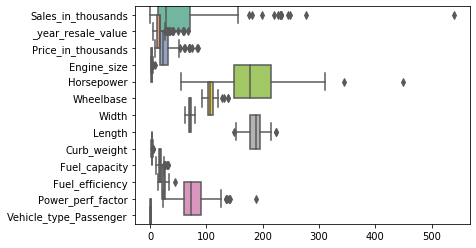

In [19]:
sns.boxplot(data=car_dummy, orient="h", palette="Set2", width=2)

In [20]:
Q1 = car_dummy.quantile(0.05)
Q3 = car_dummy.quantile(0.95)
Q_diff = Q3 - Q1

In [21]:
car_dummy = car_dummy[~((car_dummy < (Q1 - Q_diff))|(car_dummy > (Q3 + Q_diff))).any(axis=1)]

In [22]:
car_dummy.shape

(154, 13)

In [78]:
mycar_df = car_dummy[['Price_in_thousands','Engine_size','Wheelbase','Fuel_efficiency','Vehicle_type_Passenger', 'Sales_in_thousands'] ]


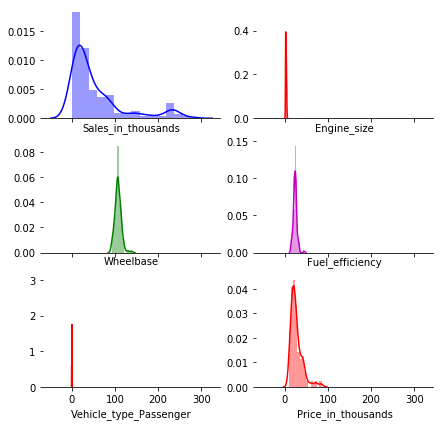

In [88]:
f, axes = plt.subplots(3, 2, figsize=(7, 7), sharex=True)                                      # Set up the matplotlib figure
sns.despine(left=True)

sns.distplot(mycar_df.Sales_in_thousands, color="b", ax=axes[0, 0])

sns.distplot(mycar_df.Engine_size, color="r", ax=axes[0, 1])

sns.distplot(mycar_df.Wheelbase, color="g", ax=axes[1, 0])

sns.distplot(mycar_df.Fuel_efficiency, color="m", ax=axes[1, 1])

sns.distplot(mycar_df.Vehicle_type_Passenger, color="r", ax=axes[2, 0])

sns.distplot(mycar_df.Price_in_thousands, color="r", ax=axes[2, 1])


In [90]:
mycar_df.head(4)

,Price_in_thousands,Engine_size,Wheelbase,Fuel_efficiency,Vehicle_type_Passenger,Sales_in_thousands
0,21.5,1.8,101.2,28,1,16.919
1,28.4,3.2,108.1,25,1,39.384
2,29.0,3.2,106.9,26,1,14.114
3,42.0,3.5,114.6,22,1,8.588


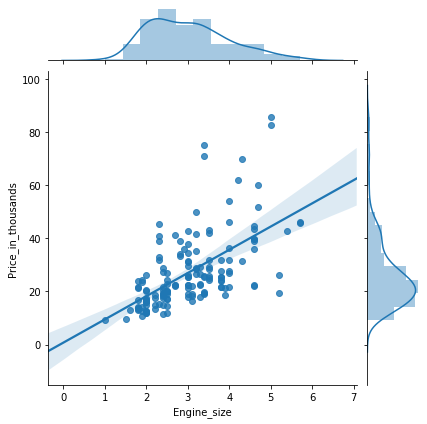

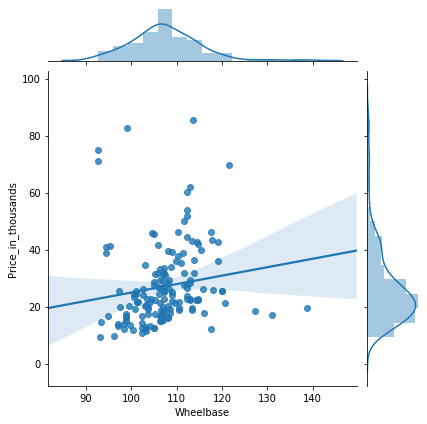

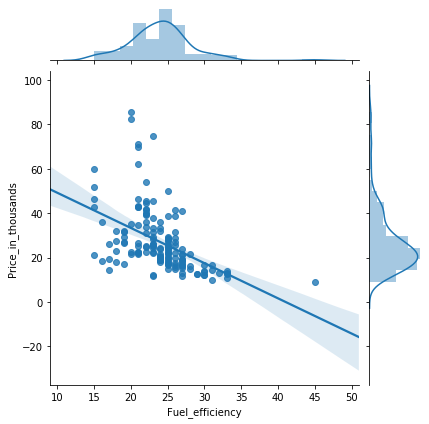

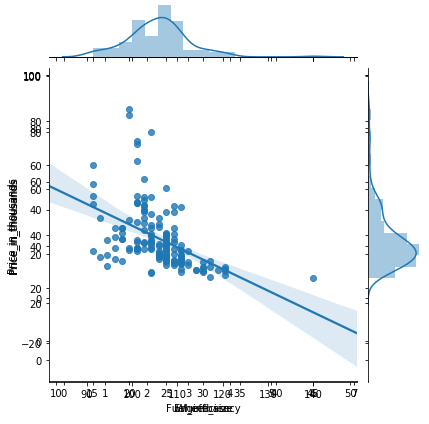

In [95]:
JG1 = sns.jointplot("Engine_size", "Price_in_thousands", data=mycar_df, kind='reg')
JG2 = sns.jointplot("Wheelbase", "Price_in_thousands", data=mycar_df, kind='reg')
JG3 = sns.jointplot("Fuel_efficiency", "Price_in_thousands", data=mycar_df, kind='reg')

#subplots migration
f = plt.figure()
for J in [JG1, JG2,JG3]:
    for A in J.fig.axes:
        f._axstack.add(f._make_key(A), A)

//anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


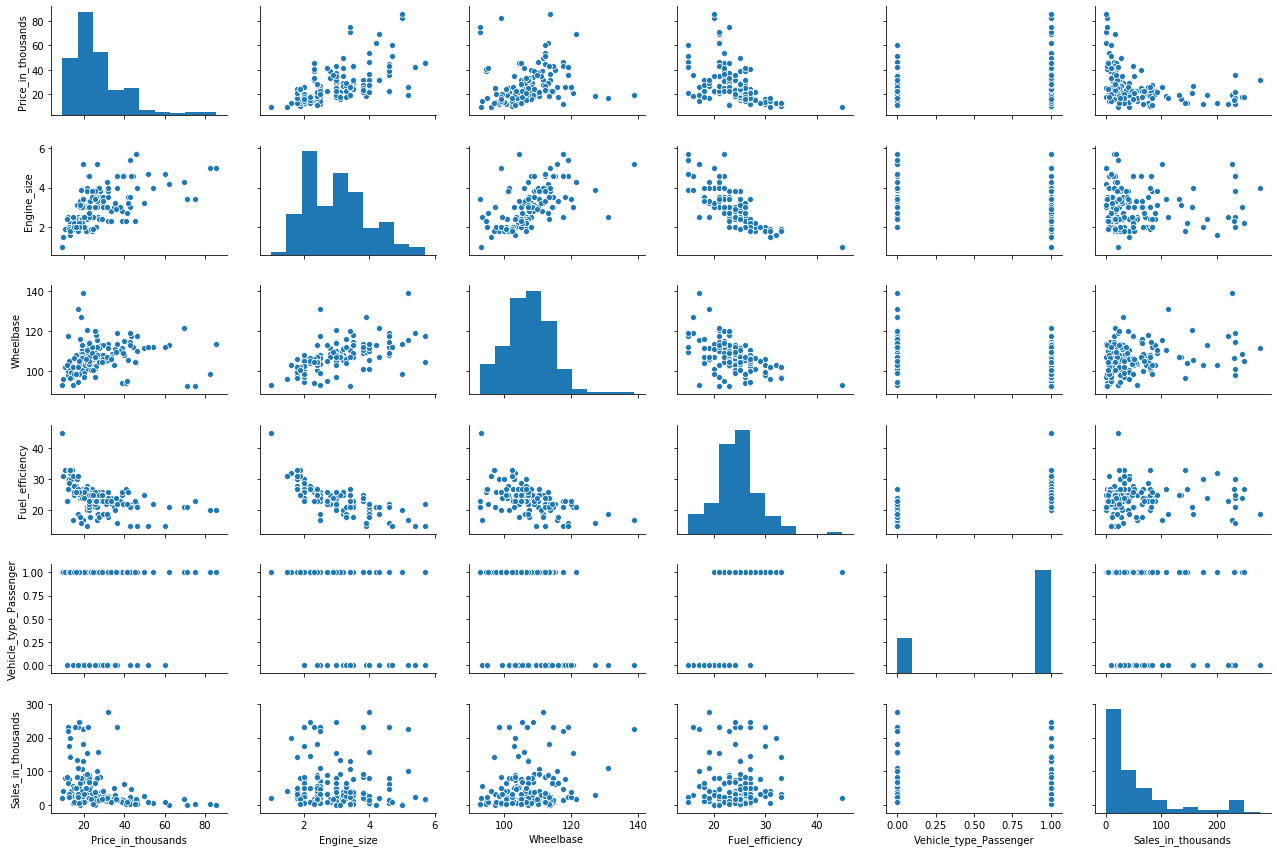

In [93]:
sns.pairplot(mycar_df, size = 2, aspect = 1.5)

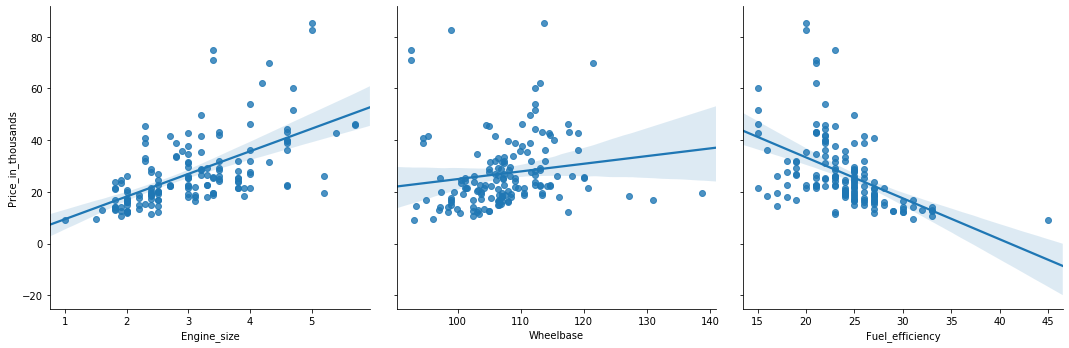

In [96]:
sns.pairplot(mycar_df, x_vars=['Engine_size', 'Wheelbase', 'Fuel_efficiency'], y_vars='Price_in_thousands', size=5, aspect=1, kind='reg')



In [80]:
mycar_df.corr()

,Price_in_thousands,Engine_size,Wheelbase,Fuel_efficiency,Vehicle_type_Passenger,Sales_in_thousands
Price_in_thousands,1.000000,0.602370,0.152827,-0.476797,0.034471,-0.354450
Engine_size,0.602370,1.000000,0.556036,-0.737014,-0.287026,-0.002825
Wheelbase,0.152827,0.556036,1.000000,-0.520230,-0.364108,0.187766
Fuel_efficiency,-0.476797,-0.737014,-0.520230,1.000000,0.579953,0.037789
Vehicle_type_Passenger,0.034471,-0.287026,-0.364108,0.579953,1.000000,-0.156124
Sales_in_thousands,-0.354450,-0.002825,0.187766,0.037789,-0.156124,1.000000


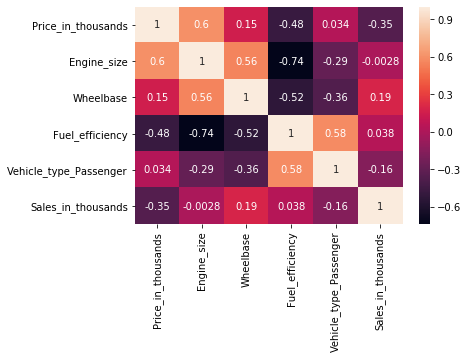

In [81]:
sns.heatmap( mycar_df.corr(), annot=True );

In [97]:
std = pd.DataFrame()
car_modify = car_dummy.drop(car_dummy[['Price_in_thousands']], axis=1)
scaler = StandardScaler().fit(car_modify)
std = scaler.transform(car_modify)

In [98]:
type(std)

numpy.ndarray

In [99]:
car_modify.head(2)

,Sales_in_thousands,_year_resale_value,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Vehicle_type_Passenger
0,16.919,16.360,1.8,140,101.2,67.3,172.4,2.639,13.2,28,58.280150,1
1,39.384,19.875,3.2,225,108.1,70.3,192.9,3.517,17.2,25,91.370778,1


In [100]:
columns = ['_year_resale_value','Sales_in_thousands','Engine_size','Horsepower','Wheelbase','Width','Length','Curb_weight','Fuel_capacity','Fuel_efficiency','Power_perf_factor','Vehicle_type_Passenger']



In [101]:
mycar_df = pd.DataFrame(data=std, columns=columns)

In [102]:
mycar_df.head(2)

,_year_resale_value,Sales_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor,Vehicle_type_Passenger
0,-0.595122,-0.152706,-1.268771,-0.835991,-0.856756,-1.114212,-1.126791,-1.172960,-1.218395,0.971917,-0.768425,0.582349
1,-0.244910,0.214788,0.188592,0.778515,0.103064,-0.227296,0.436986,0.226478,-0.181177,0.256908,0.640456,0.582349


In [103]:
X = pd.DataFrame()

In [104]:
feature_cols = ['Sales_in_thousands','Engine_size','Wheelbase','Fuel_efficiency','Vehicle_type_Passenger']                


In [105]:
X = mycar_df[feature_cols]

In [106]:
X.head(2)

,Sales_in_thousands,Engine_size,Wheelbase,Fuel_efficiency,Vehicle_type_Passenger
0,-0.152706,-1.268771,-0.856756,0.971917,0.582349
1,0.214788,0.188592,0.103064,0.256908,0.582349


In [107]:
X.shape

(154, 5)

In [108]:
type(X)

pandas.core.frame.DataFrame

In [109]:
y = pd.DataFrame()

In [110]:
y = car_dummy['Price_in_thousands']

In [111]:
y.shape

(154,)

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [113]:
print('Train cases as below')
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (107, 5)
y_train shape:  (107,)

Test cases as below
X_test shape:  (47, 5)
y_test shape:  (47,)


In [114]:
linreg = LinearRegression()

In [115]:
linreg.fit(X_train, y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [116]:
print('Intercept:',linreg.intercept_)          # print the intercept 
print('Coefficients:',linreg.coef_)  

Intercept: 26.719038839741994
Coefficients: [ 8.29835431  4.64211973 -0.25973734 -1.52177782  1.3704207 ]


In [117]:
feature_cols.insert(0,'Intercept')
print(feature_cols)
coef = linreg.coef_.tolist()            
coef.insert(0, linreg.intercept_)      
print(coef)

['Intercept', 'Sales_in_thousands', 'Engine_size', 'Wheelbase', 'Fuel_efficiency', 'Vehicle_type_Passenger']
[26.719038839741994, 8.298354311548207, 4.6421197313307765, -0.2597373373877851, -1.521777818916884, 1.3704206991374424]


In [118]:
eq1 = zip(feature_cols, coef)

for c1,c2 in eq1:
    print(c1,c2)

Intercept 26.719038839741994
Sales_in_thousands 8.298354311548207
Engine_size 4.6421197313307765
Wheelbase -0.2597373373877851
Fuel_efficiency -1.521777818916884
Vehicle_type_Passenger 1.3704206991374424


In [123]:
y_pred_train = linreg.predict(X_train)  

In [120]:
y_pred_test = linreg.predict(X_test) 

In [124]:
MAE_train = metrics.mean_absolute_error(y_train, y_pred_train)
MAE_test = metrics.mean_absolute_error(y_test, y_pred_test)

In [125]:
print('MAE for training set is {}'.format(MAE_train))
print('MAE for test set is {}'.format(MAE_test))

MAE for training set is 4.207313576824321
MAE for test set is 4.166774879607508


In [127]:
MSE_train = metrics.mean_squared_error(y_train, y_pred_train)
MSE_test = metrics.mean_squared_error(y_test, y_pred_test)

In [128]:
print('MSE for training set is {}'.format(MSE_train))
print('MSE for test set is {}'.format(MSE_test))

MSE for training set is 50.14739199191718
MSE for test set is 39.303980925457786


In [129]:
RMSE_train = np.sqrt( metrics.mean_squared_error(y_train, y_pred_train))
RMSE_test = np.sqrt(metrics.mean_squared_error(y_test, y_pred_test))

In [130]:
print('RMSE for training set is {}'.format(RMSE_train))
print('RMSE for test set is {}'.format(RMSE_test))

RMSE for training set is 7.081482330128148
RMSE for test set is 6.269288709690899


In [131]:
yhat = linreg.predict(X_train)
SS_Residual = sum((y_train-yhat)**2)
SS_Total = sum((y_train-np.mean(y_train))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.7045429159776732 0.6899163276597362


In [132]:
yhat = linreg.predict(X_test)
SS_Residual = sum((y_test-yhat)**2)
SS_Total = sum((y_test-np.mean(y_test))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(r_squared, adjusted_r_squared)

0.8399624210959765 0.8204456431808517
